This colab is for reading OMI-Aura sensor HDF5 data sets. 
Import the data in Files and run the cells.

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
!pip install pyproj==1.9.6

In [0]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import h5py


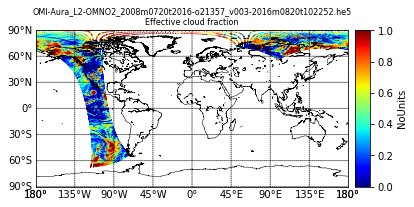

In [0]:
FILE_NAME = 'OMI-Aura_L2-OMNO2_2008m0720t2016-o21357_v003-2016m0820t102252.he5'
path = '/HDFEOS/SWATHS/ColumnAmountNO2/Data Fields/'
DATAFIELD_NAME = path + 'CloudFraction'
with h5py.File(FILE_NAME, mode='r') as f:
    dset = f[DATAFIELD_NAME]
    data = dset[:].astype(np.float64)

    # Retrieve any attributes that may be needed later.
    # String attributes actually come in as the bytes type and should
    # be decoded to UTF-8 (python3).
    scale = f[DATAFIELD_NAME].attrs['ScaleFactor']
    offset = f[DATAFIELD_NAME].attrs['Offset']
    missing_value = f[DATAFIELD_NAME].attrs['MissingValue']
    fill_value = f[DATAFIELD_NAME].attrs['_FillValue']
    title = f[DATAFIELD_NAME].attrs['Title'].decode()
    units = f[DATAFIELD_NAME].attrs['Units'].decode()

    # Retrieve the geolocation data.
    path = '/HDFEOS/SWATHS/ColumnAmountNO2/Geolocation Fields/'
    latitude = f[path + 'Latitude'][:]
    longitude = f[path + 'Longitude'][:]

    data[data == missing_value] = np.nan
    data[data == fill_value] = np.nan
    data = scale * (data - offset)
    datam = np.ma.masked_where(np.isnan(data), data)

    # Draw an equidistant cylindrical projection using the low resolution
    # coastline database.
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=-180, urcrnrlon=180)
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180, 180., 45.), labels=[0, 0, 0, 1])
    m.scatter(longitude, latitude, c=datam, s=1, cmap=plt.cm.jet,
              edgecolors=None, linewidth=0)
    cb = m.colorbar()
    cb.set_label(units)

    basename = os.path.basename(FILE_NAME)
    plt.title('{0}\n{1}'.format(basename, title), fontsize=8)
    fig = plt.gcf()
    pngfile = "{0}.py.png".format(basename)
    fig.savefig(pngfile)
